In [1]:
import pandas as pd
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load .env enviroment variables into the notebook
load_dotenv()
# Get the postgres connection information from os file. 

DB_HOST = os.getenv('DB_HOST')
DB_NAME = os.getenv('DB_NAME')
DB_USER = os.getenv('DB_USER')
DB_PASS = os.getenv('DB_PASS')


In [2]:
# initialize database engine
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:5432/Houston_real_estate')


In [3]:
#run query to extract properties that are on the market from Harris County Appraisal district (HCAD) 
# database; street name and number should match; apartment number should match; zip code 
# must match between hcad table and har table; there should not be any properties with 0 appraisal 
# value and also should not be any properties with 0 street number as these represent plots of land
# that don't yet have an address and are owed by the county. 
price_vs_appraised_df = pd.read_sql('''
select ha.mls,ha.address,ha.zipcode,
ha.price as "har price", r.tot_appr_val as "hcad appraised value",
r.tot_mkt_val as "hcad total mkt value"
from har_address ha, real_acct r
where ha.zipcode = r.site_addr_3
and upper(ha.streetname) = upper(r.str)
and ha.addressnumber = r.str_num
and r.str_unit=ha.occupancyidentifier
and r.str_num!='0'
and r.tot_appr_val!=0 ;
''',engine)


In [4]:
price_vs_appraised_df.head(2)

,mls,address,zipcode,har price,hcad appraised value,hcad total mkt value
0,57107762,"1 Radney Circle, Piney Point Village, TX 77024",77024,2225000.0,2086377.0,2086377.0
1,59662089,"1 W Broad Oaks Drive, Houston, TX 77056",77056,1399000.0,1329455.0,1329455.0


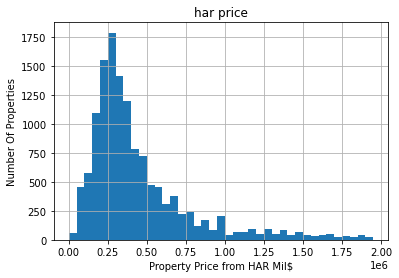

In [9]:
#Har price distribotion for the whole Harris county
custom_bins=[0+x*50000 for x in range(0, 40)]
price_vs_appraised_df.hist(column='har price', bins=custom_bins)
plt.xlabel('Property Price from HAR Mil$')
plt.ylabel("Number Of Properties");
plt.savefig('histogram_har.png', dpi=300)

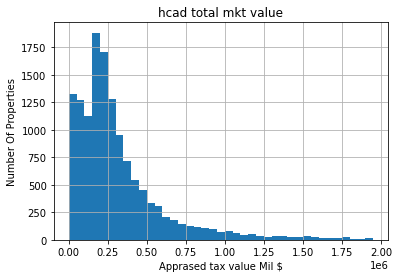

In [8]:
price_vs_appraised_df.hist(column='hcad total mkt value', bins=custom_bins)
plt.xlabel('Apprased tax value Mil $')
plt.ylabel("Number Of Properties");
plt.savefig('histogram_hcad.png', dpi=300)

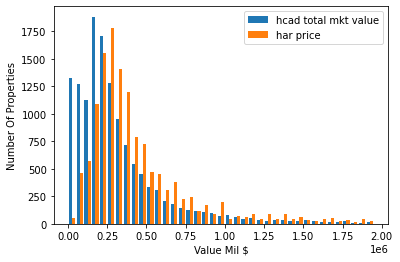

In [7]:

# conclusion - 
plt.hist([price_vs_appraised_df['hcad total mkt value'], price_vs_appraised_df['har price']], custom_bins, label=['hcad total mkt value', 'har price'])
plt.legend(loc='upper right')
plt.xlabel('Value Mil $')
plt.ylabel("Number Of Properties");
plt.savefig('histogram_all_Harris_county.png', dpi=300)
plt.show()

In [11]:
#Extract properties from zip code 77026 
price_vs_appraised_77026_df = pd.read_sql('''
select ha.mls,ha.address,ha.zipcode,
ha.price as "har price", r.tot_appr_val as "hcad appraised value",
r.tot_mkt_val as "hcad total mkt value"
from har_address ha, real_acct r
where ha.zipcode = r.site_addr_3
and upper(ha.streetname) = upper(r.str)
and ha.addressnumber = r.str_num
and r.str_unit=ha.occupancyidentifier
and r.str_num!='0'
and r.tot_appr_val!=0
and ha.zipcode='77026';
''',engine)

In [12]:
price_vs_appraised_77026_df.head(2)

,mls,address,zipcode,har price,hcad appraised value,hcad total mkt value
0,63843966,"1915 Elysian Street, Houston, TX 77026",77026,189500.0,129360.0,129360.0
1,98862739,"1922 Hardy Street, Houston, TX 77026",77026,199900.0,193447.0,193447.0


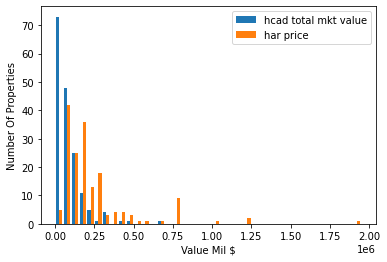

In [13]:
#plot for less affluent zip code 77026
plt.hist([price_vs_appraised_77026_df['hcad total mkt value'], price_vs_appraised_77026_df['har price']], custom_bins, label=['hcad total mkt value', 'har price'])
plt.legend(loc='upper right')
plt.xlabel('Value Mil $')
plt.ylabel("Number Of Properties");
plt.savefig('histogram_77026.png', dpi=300)
plt.show()

In [14]:
#Extract properties from zip code 77005 
price_vs_appraised_77005_df = pd.read_sql('''
select ha.mls,ha.address,ha.zipcode,
ha.price as "har price", r.tot_appr_val as "hcad appraised value",
r.tot_mkt_val as "hcad total mkt value"
from har_address ha, real_acct r
where ha.zipcode = r.site_addr_3
and upper(ha.streetname) = upper(r.str)
and ha.addressnumber = r.str_num
and r.str_unit=ha.occupancyidentifier
and r.str_num!='0'
and r.tot_appr_val!=0
and ha.zipcode='77005';
''',engine)

In [19]:
price_vs_appraised_77005_df['hcad total mkt value'].describe()

count    1.750000e+02
mean     1.145933e+06
std      7.377295e+05
min      1.680000e+04
25%      6.346335e+05
50%      9.835000e+05
75%      1.520852e+06
max      5.000000e+06
Name: hcad total mkt value, dtype: float64

In [21]:
price_vs_appraised_77005_df['har price'].describe()

count    1.750000e+02
mean     1.512427e+06
std      1.229015e+06
min      2.025000e+05
25%      7.499990e+05
50%      1.299000e+06
75%      1.899000e+06
max      1.250000e+07
Name: har price, dtype: float64

In [20]:
price_vs_appraised_77026_df['hcad total mkt value'].describe()

count       170.000000
mean      84949.376471
std       89623.198010
min       14276.000000
25%       26911.250000
50%       54210.000000
75%      111612.000000
max      678207.000000
Name: hcad total mkt value, dtype: float64

In [22]:
price_vs_appraised_77026_df['har price'].describe()

count    1.700000e+02
mean     2.612514e+05
std      4.227649e+05
min      3.500000e+04
25%      9.612500e+04
50%      1.599500e+05
75%      2.596500e+05
max      4.700000e+06
Name: har price, dtype: float64

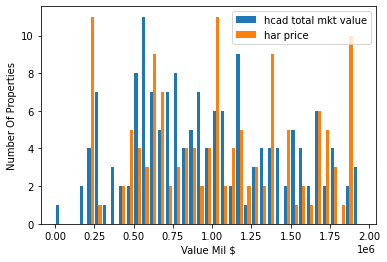

In [15]:
#Plot for rich zip code 77005
plt.hist([price_vs_appraised_77005_df['hcad total mkt value'], price_vs_appraised_77005_df['har price']], custom_bins, label=['hcad total mkt value', 'har price'])
plt.legend(loc='upper right')
plt.xlabel('Value Mil $')
plt.ylabel("Number Of Properties");
plt.savefig('histogram_77005.png', dpi=300)
plt.show()

<Figure size 432x432 with 0 Axes>

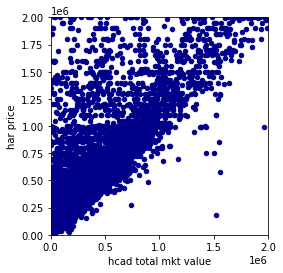

In [17]:

plt.figure(figsize = (6,6))
ax=price_vs_appraised_df.plot.scatter(x='hcad total mkt value',
                      y='har price',
                      c='DarkBlue')
ax.set_aspect(1)
plt.xlabel('hcad total mkt value')
plt.ylabel("har price");
plt.xlim(0,2000000)
plt.ylim(0,2000000)
plt.savefig('xplot_har_vs_hcad.png', dpi=300)
plt.show()